<a href="https://colab.research.google.com/github/prachigupta2006/feature-engineering/blob/main/feature_engineering_(standardization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df1=df.drop('User ID',axis=1)
df2=df1.drop('Gender',axis=1)
df2.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
df2.sample(5)

,Age,EstimatedSalary,Purchased
287,48,138000,1
141,18,68000,0
361,53,34000,1
80,30,80000,0
242,50,88000,1


TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df2.drop('Purchased',axis=1),df2['Purchased'],test_size=0.3,random_state=0)

X_train.shape,X_test.shape

((280, 2), (120, 2))

STANDARD SCALER


In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)

In [ ]:
sc.mean_

array([3.78642857e+01, 6.98071429e+04])

because when a data frame is given to scaled it retur sthe value in numpy so inorder to correct it do the following:

In [ ]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


EFFECT OF SCALING

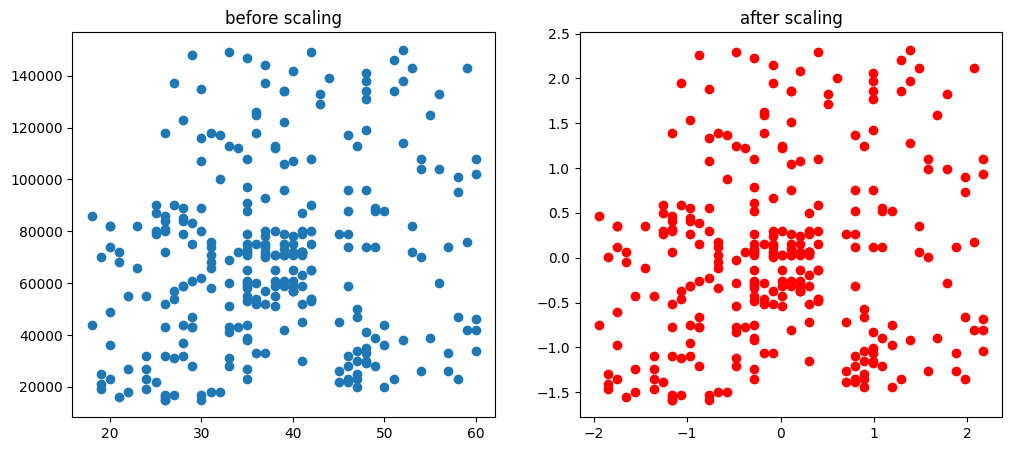

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("before scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color="red")
ax2.set_title("after scaling")
plt.show()

In this before and after diagrams one can see that the graph before saling had an extreme range and after scaling the graph squished down to a smaller range making 0 its centre (mean) and the plots are around it with the same exact shape as before scaled.

PROBABILITY DENSITY FUNCTION

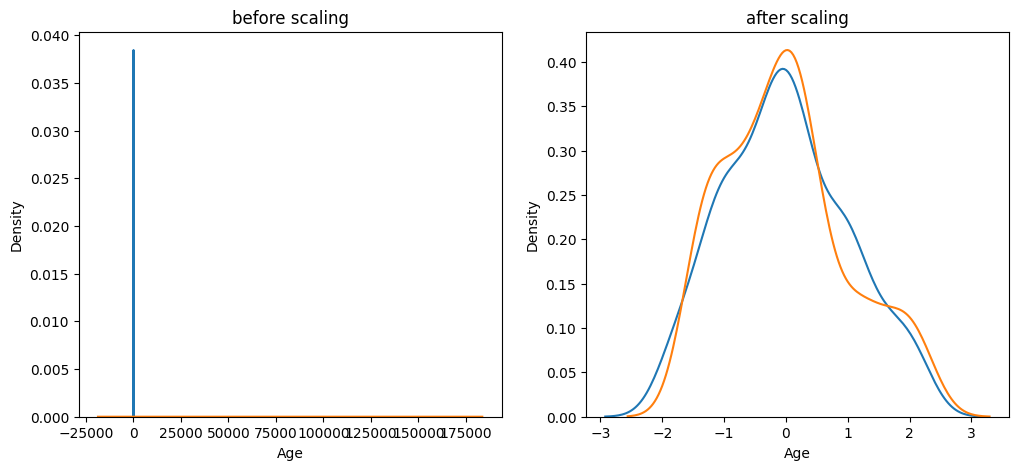

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("before scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title("after scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

after scaling graph is easily comparable and the range is in a way that it can be analysed but before scaling graph is not comparable due to its diffrence of range being age range very less taht that of salary

WHY IS SCALING IMPORTANT?

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()
lr_sc=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)
lr_sc.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred_sc = lr_sc.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_sc))

actual 0.6583333333333333
scaled 0.8666666666666667


here we are checking the importance of scaling as to how much accurate your insights/resuls come out as and as we can see teh actual data (without scaling) has 65% of accuracy whereas, the scaled data has 86% of accurace and thus we understand that how scaling your data is important .

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()
dt_sc=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)
dt_sc.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)
y_pred_sc = dt_sc.predict(X_test_scaled)

In [ ]:
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_sc))

actual 0.875
scaled 0.8666666666666667


In [ ]:
df2.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000
